# Acoustic Tomography Theory

## Sinogram

This is distribution of amplitude as a function of illumination angle. This illuminated image is a back projection.

Question: How does one go from a sinogram to a back projected image. i.e what is the difference between a sinogram and back projection 

or

The sinogram is essentially a collection of line integrals representing the ray attenuation along different paths through the material. 


This is distribution of amplitude as a function of illumination angle. This illuminated image is a back projection.

Question: How does one go from a sinogram to a back projected image. i.e what is the difference between a sinogram and back projection.

### Forward Projection

Used to generate a forward projection for **one fixed angle**

$$ p(s,\phi) =  R\{\,f(x,y)\,\}$$

#### Summary of symbols

- $ f(x,y) $ describes the the object in "physical space". i.e A standard 2 dimensional coordinate system. The function will evaluate to some value. These values **correspond to density**. High values mean high density, low values mean low density.
- $ p(s,\phi) $ describes the projection space. Simply stated as follows: For a given illumination angle $ \phi $, what is the density for a given position $ s $.
- $ R\{ \, \}$ describes the radon transform, the mapping from density at a given $x,y$ coordinate to the density at a given angle, distance $s, \phi$ coordinate

This results in the following expression:

$$ p(s,\phi) = \int_{L_{s\,\phi}}\,f(x,y)\,du$$

Note that we are transforming from a cartesian domain to something a like a circular domain. i.e instead of expressing a position in terms of $x$ and $y$, we want to express the domain in terms of two orthogonal vectors $s$ and $u$ that change as a function of out illumination angle $\phi$. The mapping between these two spaces is shown below:

$$ \begin{pmatrix} x \\ y\end{pmatrix} = \begin{pmatrix} cos(\phi) & -sin(\phi) \\ sin(\phi) & cos(\phi) \end{pmatrix}\begin{pmatrix} s \\ u \end{pmatrix}$$

Therefore:

$$ x = s\,cos(\phi) - u\,sin(\phi) \\ y = s\,sin(\phi) + u\, cos(\phi)$$

which results in

$$ s = x\,cos(\phi) + y\,sin(\phi)$$

If one then decides to substitute into the equation above we get the following:

$$ p(s,\phi) = \int_{L_{s\,\phi}}\,f(s\,cos(\phi) - u\,sin(\phi),s\,sin(\phi) + u\, cos(\phi))\,du$$

In plain words: The "total density"(?) of a material for a given angle of illumination $\phi$ at position of illumination $s$ is the summation of all the density along the orthogonal path of propagation $$ u.
 

## Back Projection

This is the inverse of the Back Projection

Note that we get $p(s,\phi)$ and want to get back to $f(x,y)$

# Tomography Simulations

## Array Simulation

- This sub script shows the position of a set of given array elements that are angularly spaced at a fixes radius (blue)
- It also places an arbitrary square object in the center of the field (green)
- And then shows the direction of propagation of the ray (red)

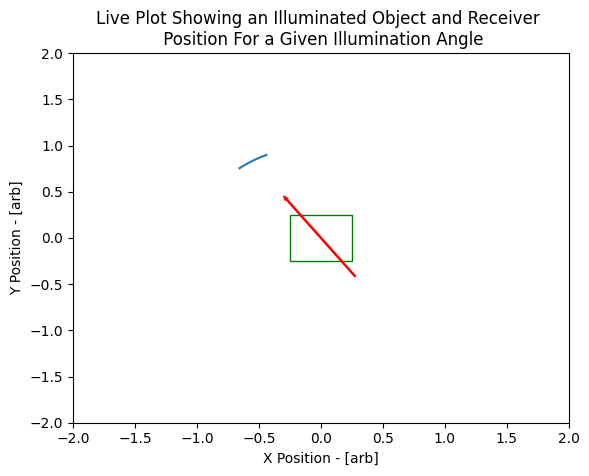

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation
import numpy as np

# Simulation sample parameters
position_samples = 45
angles_deg = np.linspace(0,359,position_samples, dtype=np.int16)

# Lets define the parameters for the receiving array
radius = 1.0 # How far these elements are spaced from the origin
element_count = 15 # How many elements in the array
element_spacing_deg = 1 # How far apart each element is (deg)
element_spacing_rad = np.deg2rad(element_spacing_deg) #
element_spacing_offsets = np.linspace(0,element_count,element_count)*element_spacing_rad - np.floor(element_count/2) # The radial offset of an element

# And preallocate the physical coordinated of each array element
x = np.zeros((element_count,position_samples))
y = np.zeros((element_count,position_samples))

# Lets now take measurements for every illumination angle
for illumination_angle_index in range(len(angles_deg)):
        
        angle_rad = np.deg2rad(angles_deg[illumination_angle_index])

        # At every angle we need to know the physical position of each element
        # So we assume a curved array, spaced at 1 degree
        for element_index in range(element_count):

            # We convert the spherical coordinates to cartesian 
            # To plot the position of the array
            x[element_index,illumination_angle_index] = (radius * np.sin(angle_rad + element_spacing_offsets[element_index]))
            y[element_index,illumination_angle_index] = (radius* np.cos(angle_rad + element_spacing_offsets[element_index]))

# We can also start to build up our plot
fig, ax = plt.subplots()
ax.axis([-2,2,-2,2])
l, = ax.plot([],[])

# Adding some titles
ax.set_xlabel("X Position - [arb]")
ax.set_ylabel("Y Position - [arb]")
ax.set_title("Live Plot Showing an Illuminated Object and Receiver \n Position For a Given Illumination Angle")

# By adding a simulaed object to the plot by defining the bottom left corner
square = patches.Rectangle((-0.25, -0.25), 0.5, 0.5, linewidth=1, edgecolor='green', facecolor='none')
ax.add_patch(square)

# With the object inplace, we can set up a method to start creating video frames
def GenerateFrame(i):
    l.set_data(x[:,i], y[:,i])

    # Lets remove the old arrows so they dont clutter the plot
    children = ax.get_children()
    for child in children:
        if isinstance(child, patches.FancyArrow):
             child.remove()
    
    # And then show the direction of propagation of the signal
    ax.arrow(-x[7,i]*0.5, -y[7,i]*0.5,x[7,i], y[7,i],width=0.01, color="red")
    
# Now generate all the frames
ani = matplotlib.animation.FuncAnimation(fig, GenerateFrame, frames=len(angles_deg-10))

# And create a pretty pretty video
from IPython.display import HTML
HTML(ani.to_jshtml())

## Sinogram Simulation

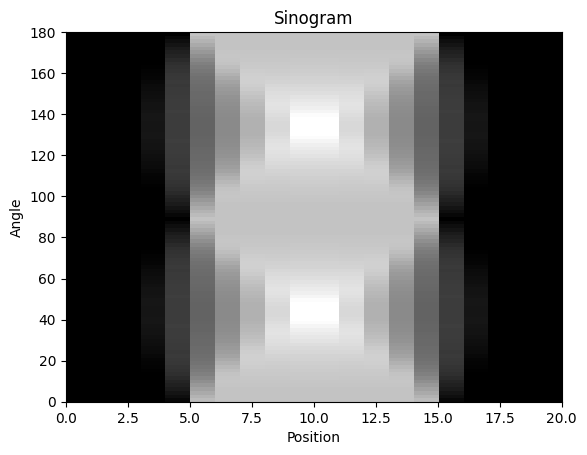

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a phantom represented as a 2D array
phantom_rows = 20
phantom_columns = 20
phantom = np.zeros((phantom_rows,phantom_columns))
phantom[5:15,5:15] = 1
# Define the angles for projection
num_angles = 100  # Number of angles
max_illumination_angle = 180
angles = np.linspace(0, max_illumination_angle, num_angles, endpoint=False)

# Generate sinogram
sinogram = np.zeros((num_angles, phantom.shape[0]), dtype=np.float32)
center = (phantom.shape[0] - 1) / 2  # Assume phantom is centered

# Lets now iterate through each illumination angle
for i, angle in enumerate(angles):
    # And calculate the rotation matrix (TODO: Why?)
    rotation_matrix = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
                                [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
    # iterate though the first image axis (row)
    for j in range(phantom.shape[0]):
        # Note that j is an axis index, to map to 
        # position, we remove half the array size
        y = j - center
        for k in range(phantom.shape[1]):
            # And then the x index doing the same
            # index position conversion
            x = k - center
            # This position is then rotated around the origin
            # to get projected values? 

            # This works as we can either model the object
            # as moving or the illuminator, we are rotating
            # the object

            # @ is the matrix multiply operation
            rotated_coordinates = rotation_matrix @ np.array([x, y])
            x_rotated, y_rotated = rotated_coordinates
            x_rotated += center
            y_rotated += center

            # Perform interpolation to calculate sinogram value
            if (0 <= x_rotated < phantom.shape[1] - 1) and (0 <= y_rotated < phantom.shape[0] - 1):
                x_floor, y_floor = int(np.floor(x_rotated)), int(np.floor(y_rotated))
                x_ceil, y_ceil = int(np.ceil(x_rotated)), int(np.ceil(y_rotated))
                dx = x_rotated - x_floor
                dy = y_rotated - y_floor
                # Note that phantom[y_floor, x_floor] is the equivalent of f(cos(phi) - sin(phi), sin(phi) + cos(phi))
                sinogram[i, j] += (1 - dx) * (1 - dy) * phantom[y_floor, x_floor]
                sinogram[i, j] += dx * (1 - dy) * phantom[y_floor, x_ceil]
                sinogram[i, j] += (1 - dx) * dy * phantom[y_ceil, x_floor]
                sinogram[i, j] += dx * dy * phantom[y_ceil, x_ceil]

# Display sinogram
plt.imshow(sinogram, cmap='gray', aspect='auto',extent=[0, phantom_rows,
                               0, max_illumination_angle])
plt.xlabel('Position')
plt.ylabel('Angle')
plt.title('Sinogram')
plt.show()


## Wavelength Analysis

This just tries to get a feel for how large a wave lenght is for a particular frequency. This should allow one to develop a feel for how large of a structure will respond to a given frequency

In [5]:
# v = f lambda

# Lets only look at the highest frequency analysis
# at an audio sample rate of 192KHz is the absolute max
fs = 192000
f = fs/2
# Speed of sound in tissue is 
v = 1650

print(f' Smallest structure to react to sound is {100*v/f} cm')

 Smallest structure to react to sound is 1.5625 cm
